In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
#loading data
df_train = pd.read_csv('train_income.csv')
df_test = pd.read_csv('test_income.csv')

In [5]:
#Basic adat check
print(df_train.shape)
print(df_test.shape)

(9557, 143)
(23856, 142)


In [6]:
df_train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [7]:
df_test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


# Identify the output variable.

In [15]:
df_train['Target'].unique()

array([4, 2, 3, 1], dtype=int64)

In [14]:
# here Target column is the Output variable and it has 4 unique values, 1,2,3,4

# Understand the type of data.

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [32]:
print(df_train.dtypes.value_counts())

int64      130
float64      8
object       5
dtype: int64


In [27]:
df_train.isnull().sum().any()

True

In [30]:
df_train.duplicated().sum().any()

False

In [17]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


In [33]:
print(df_test.dtypes.value_counts())

int64      129
float64      8
object       5
dtype: int64


In [28]:
df_test.isnull().sum().any()

True

In [31]:
df_test.duplicated().sum().any()

False

In [ ]:
# There are three types of data, Float, integer and object

In [18]:
# check categorical data
df_train.describe(include='object')

,Id,idhogar,dependency,edjefe,edjefa
count,9557,9557,9557,9557,9557
unique,9557,2988,31,22,22
top,ID_0e6f79656,fd8a6d014,yes,no,no
freq,1,13,2192,3762,6230


In [19]:
df_test.describe(include='object')

,Id,idhogar,dependency,edjefe,edjefa
count,23856,23856,23856,23856,23856
unique,23856,7352,35,22,22
top,ID_d913e843f,830539cad,yes,no,no
freq,1,13,5388,9056,15845


# Observation 1:
    * The output variable = 'Target'
    * There are missing values in both training and test datasets
    * There are no duplicate values in the given datasets
    * We have three datatypes (float, Integer and object) in the datsets
    * The object datatype (categorical values) columns are:
         * id = Unique ID
        * idhogar = Household level identifier
        * dependency = Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)
        * edjefe = years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
        * edjefa = years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0

# Data Preprocessing

In [35]:
#checking the data that are of Object datatype

In [38]:
df_train['idhogar'].value_counts()

fd8a6d014    13
ae6cf0558    12
0c7436de6    12
4476ccd4c    11
b7a0b59d7    11
6b35cdcf0    11
3fe29a56b    11
7cad2d6c4    10
f2a4cd356    10
63f11d6ea    10
0fc6c05f7    10
6a96a96c0    10
a18c0c0be    10
d43a04997     9
d4e1dc02c     9
1ed926340     9
322cefd2f     9
06ca88023     9
efec7e82c     9
9fd143d1f     9
9d70c1551     9
ae489f548     9
476b3f2ee     9
a2f99b6bc     8
493f97dcb     8
2f8fab5de     8
7b7ebaf70     8
1c0b1cbd8     8
a32c04257     8
da2ecdcfd     8
             ..
cd3c14d62     1
567183582     1
48446f702     1
fd40fe01a     1
6894e9146     1
40e8e0902     1
96083a24f     1
4a42abb16     1
99411766c     1
dd7adf3ea     1
f78b21d0c     1
7534b04c6     1
f3b7584c0     1
84705aa3b     1
e458080a4     1
6c951f83a     1
19a9cacc3     1
41e544444     1
3886a7737     1
0c975d1f4     1
7789c8d4b     1
fd80dfac4     1
419a97af0     1
bb631bc5d     1
a382bbff2     1
7fc5dc154     1
9f6b2b309     1
2cf8c814f     1
7a883bf28     1
d5471169a     1
Name: idhogar, Length: 2

In [39]:
df_train['dependency'].value_counts()

yes          2192
no           1747
.5           1497
2             730
1.5           713
.33333334     598
.66666669     487
8             378
.25           260
3             236
4             100
.75            98
.2             90
1.3333334      84
.40000001      84
2.5            77
5              24
.80000001      18
3.5            18
1.25           18
2.25           13
.71428573      12
.22222222      11
1.2            11
1.75           11
.83333331      11
.2857143        9
1.6666666       8
.60000002       8
.16666667       7
6               7
Name: dependency, dtype: int64

In [40]:
df_train['edjefe'].value_counts()

no     3762
6      1845
11      751
9       486
3       307
15      285
8       257
7       234
5       222
14      208
17      202
2       194
4       137
16      134
yes     123
12      113
10      111
13      103
21       43
18       19
19       14
20        7
Name: edjefe, dtype: int64

In [41]:
df_train['edjefa'].value_counts()

no     6230
6       947
11      399
9       237
8       217
15      188
7       179
5       176
3       152
4       136
14      120
16      113
10       96
2        84
17       76
12       72
yes      69
13       52
21        5
19        4
18        3
20        2
Name: edjefa, dtype: int64

# Observation 2:
    * we see that the column 'ID' = Unique ID  and 'idhogar' =Household level identifier can be removed from the dataset as this is not reqired for our modelling
    * feature 'dependency' has 'yes' and 'no' values which update as yes=1 and no=0
    * similary for feature 'edjefe' and 'edjefa', we can update the yes =1 and no =0

In [65]:
#converting the feature ' dependency' ,'edjefe' and 'edjefa' from object to float

In [66]:
def map(i):
    if i == 'yes':
        return float(1)
    elif i =='no':
        return float(0)
    else:
        return float(i)

In [63]:
df_train['dependency'] = df_train['dependency'].apply(map)
df_train['edjefe'] = df_train['edjefe'].apply(map)
df_train['edjefa'] = df_train['edjefa'].apply(map)

In [67]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(11), int64(130), object(2)
memory usage: 10.4+ MB


In [68]:
df_test['dependency'] = df_test['dependency'].apply(map)
df_test['edjefe'] = df_test['edjefe'].apply(map)
df_test['edjefa'] = df_test['edjefa'].apply(map)

In [69]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(11), int64(129), object(2)
memory usage: 25.8+ MB


#### dropping the 'ID' and 'idhogar' columns from the training and test dataset as we don not need for these colums for modelling

In [72]:
df_train1 = df_train.drop(['Id','idhogar'], axis=1)
df_test1 = df_test.drop(['Id','idhogar'], axis=1)
print(df_train1.shape)
print(df_test1.shape)

(9557, 141)
(23856, 140)


In [73]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 141 entries, v2a1 to Target
dtypes: float64(11), int64(130)
memory usage: 10.3 MB


In [74]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 140 entries, v2a1 to agesq
dtypes: float64(11), int64(129)
memory usage: 25.5 MB


# Check if there are any biases in your dataset.

In [76]:
# checking columns with zero variance
for i in df_train1.columns:
    if df_train1[i].var() <=0:
        print(i,'has 0 variance')

elimbasu5 has 0 variance


In [80]:
for i in df_test1.columns:
    if df_test1[i].var() <=0:
        print(i,'has 0 variance')

* We see that there is on feature n training datset 'elimbasu5'= 1 if rubbish disposal mainly by throwing in river, creek or sea, which has Zero variance, which can be removed from the dataset

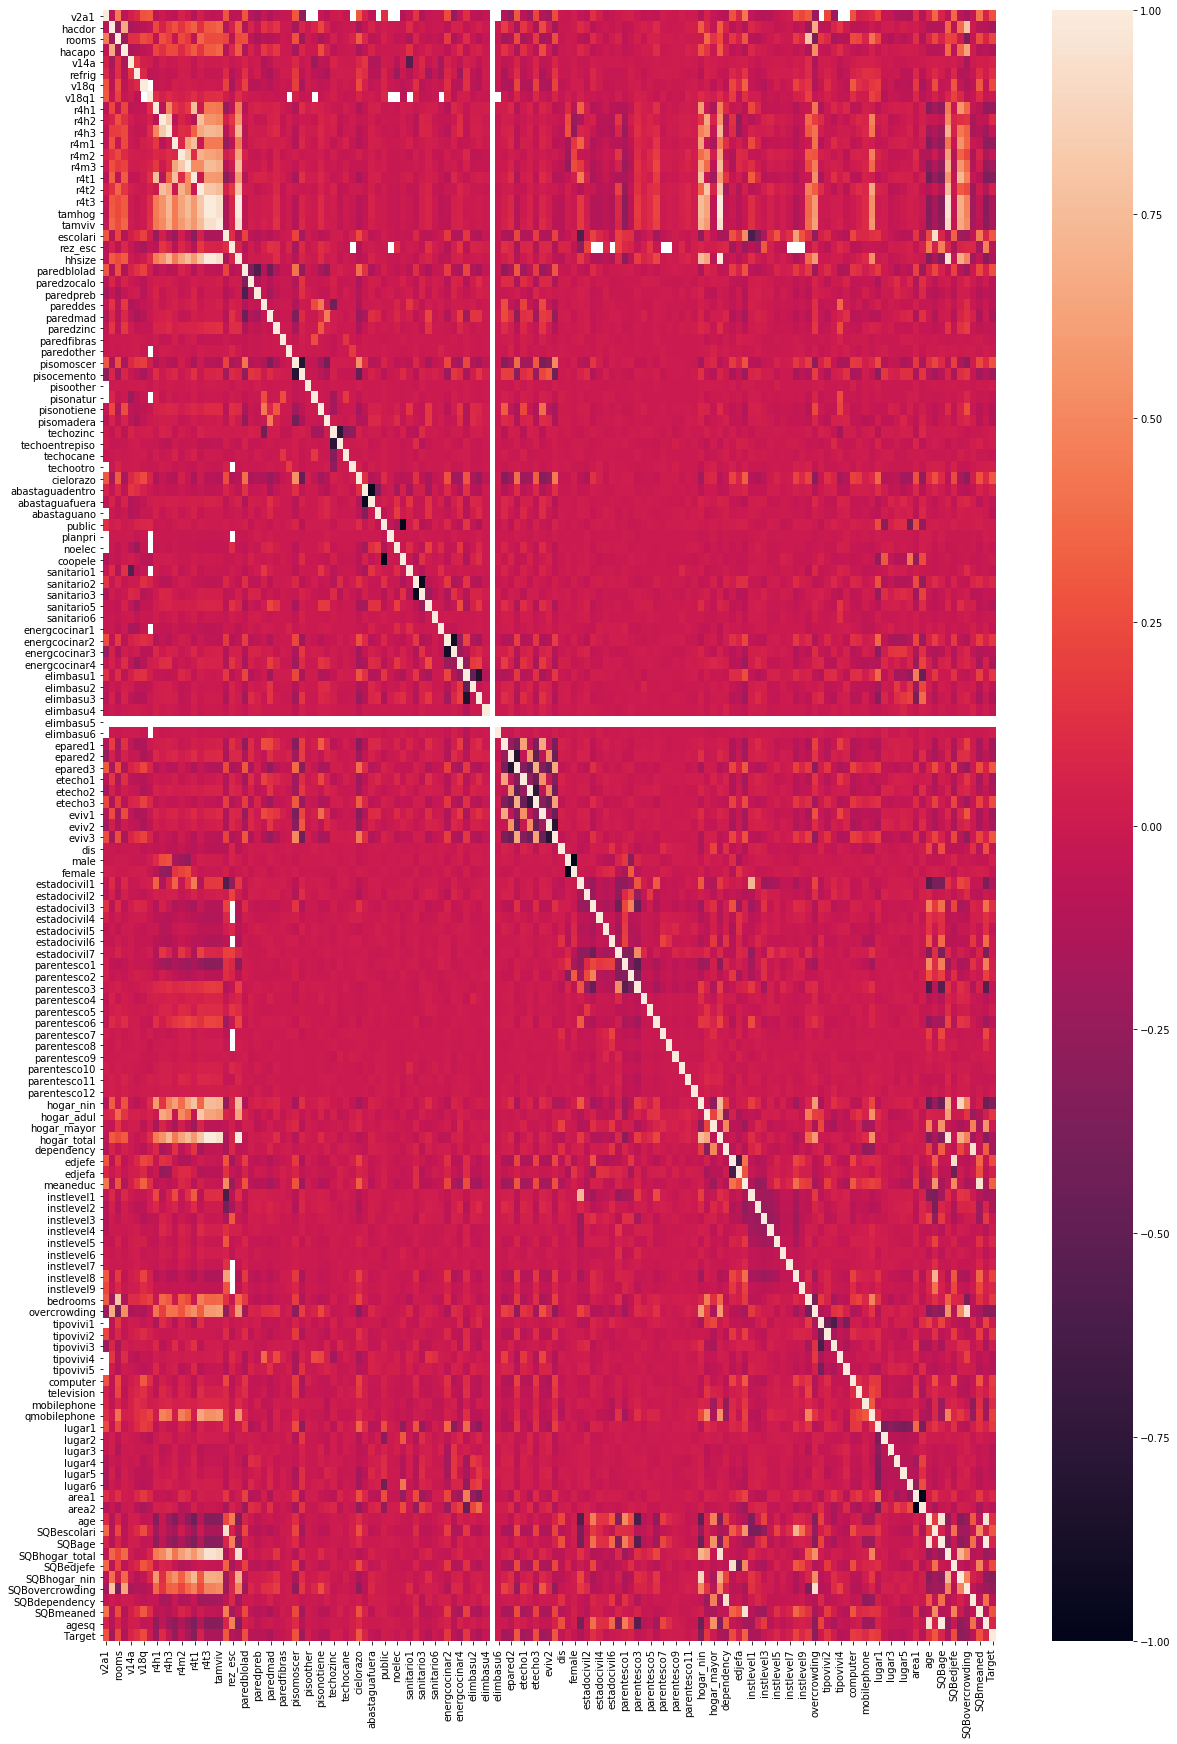

In [92]:
import seaborn as sns
plt.figure(figsize=(20,30))
sns.heatmap(df_train1.corr())

In [95]:
#v2a1, Monthly rent payment vs tipovivi3, =1 rented
df_train1[['v2a1','tipovivi3']].corr()

,v2a1,tipovivi3
v2a1,1.000000,-0.226177
tipovivi3,-0.226177,1.000000


In [96]:
# v18q, owns a tablet vs v18q1, number of tablets household owns
df_train1[['v18q','v18q1']].corr()

,v18q,v18q1
v18q,1.0,NaN
v18q1,NaN,1.0


In [97]:
# r4t3, Total persons in the household vs hogar_total, # of total individuals in the household
df_train1[['r4t3','hogar_total']].corr()

,r4t3,hogar_total
r4t3,1.000000,0.998107
hogar_total,0.998107,1.000000


In [98]:
# hogar_adul, Number of adults in household vs hogar_mayor, # of individuals 65+ in the household
df_train1[['hogar_adul','hogar_mayor']].corr()

,hogar_adul,hogar_mayor
hogar_adul,1.000000,0.217684
hogar_mayor,0.217684,1.000000


In [99]:
# hacapo, =1 Overcrowding by rooms vs overcrowding, # persons per room
df_train1[['hacapo','overcrowding']].corr()

,hacapo,overcrowding
hacapo,1.000000,0.530401
overcrowding,0.530401,1.000000


## Observation 3:
* #### by looking at the correlation we do see that there are some strong correlation between variables
* #### this gives us an idea that there are some relationship betwwen two variables and for good result we can use any one of them
* #### therefore there are some biases in the dataset

# Check whether all members of the house have the same poverty level.

In [101]:
df_check=df_train[['parentesco1','parentesco2','parentesco3','parentesco4','parentesco5','parentesco6','parentesco7','parentesco8',
        'parentesco9','parentesco10','parentesco11','parentesco12','Target']]

In [103]:
df_check.head()

,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,Target
0,1,0,0,0,0,0,0,0,0,0,0,0,4
1,1,0,0,0,0,0,0,0,0,0,0,0,4
2,1,0,0,0,0,0,0,0,0,0,0,0,4
3,0,0,1,0,0,0,0,0,0,0,0,0,4
4,0,1,0,0,0,0,0,0,0,0,0,0,4


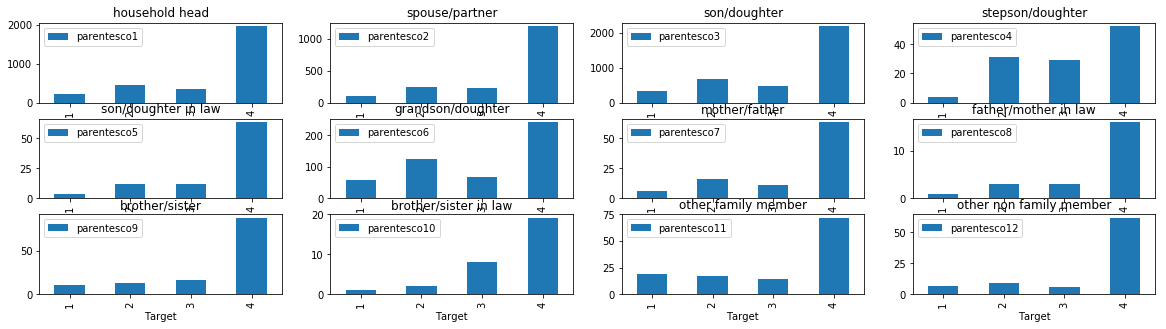

In [174]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20,5))

df_check_parentesco1 = df_check[['parentesco1','Target']]
df_check_parentesco1 = df_check_parentesco1[df_check_parentesco1['parentesco1']==1]
#df_check_parentesco1.head()
df_check_parentesco1.groupby(['Target'])[['parentesco1']].sum().plot(ax=axes[0,0], kind='bar')
axes[0, 0].set_title("household head")

df_check_parentesco2 = df_check[['parentesco2','Target']]
df_check_parentesco2 = df_check_parentesco2[df_check_parentesco2['parentesco2']==1]
#df_check_parentesco1.head()
df_check_parentesco2.groupby(['Target'])[['parentesco2']].sum().plot(ax=axes[0,1], kind='bar')
axes[0, 1].set_title("spouse/partner")

df_check_parentesco3 = df_check[['parentesco3','Target']]
df_check_parentesco3 = df_check_parentesco3[df_check_parentesco3['parentesco3']==1]
#df_check_parentesco1.head()
df_check_parentesco3.groupby(['Target'])[['parentesco3']].sum().plot(ax=axes[0,2], kind='bar')
axes[0, 2].set_title("son/doughter")

df_check_parentesco4 = df_check[['parentesco4','Target']]
df_check_parentesco4 = df_check_parentesco4[df_check_parentesco4['parentesco4']==1]
#df_check_parentesco1.head()
df_check_parentesco4.groupby(['Target'])[['parentesco4']].sum().plot(ax=axes[0,3], kind='bar')
axes[0, 3].set_title("stepson/doughter")

df_check_parentesco5 = df_check[['parentesco5','Target']]
df_check_parentesco5= df_check_parentesco5[df_check_parentesco5['parentesco5']==1]
#df_check_parentesco1.head()
df_check_parentesco5.groupby(['Target'])[['parentesco5']].sum().plot(ax=axes[1,0], kind='bar')
axes[1, 0].set_title("son/doughter in law")

df_check_parentesco6 = df_check[['parentesco6','Target']]
df_check_parentesco6= df_check_parentesco6[df_check_parentesco6['parentesco6']==1]
#df_check_parentesco1.head()
df_check_parentesco6.groupby(['Target'])[['parentesco6']].sum().plot(ax=axes[1,1], kind='bar')
axes[1, 1].set_title("grandson/doughter")

df_check_parentesco7 = df_check[['parentesco7','Target']]
df_check_parentesco7= df_check_parentesco7[df_check_parentesco7['parentesco7']==1]
#df_check_parentesco1.head()
df_check_parentesco7.groupby(['Target'])[['parentesco7']].sum().plot(ax=axes[1,2], kind='bar')
axes[1, 2].set_title("mother/father")

df_check_parentesco8 = df_check[['parentesco8','Target']]
df_check_parentesco8= df_check_parentesco8[df_check_parentesco8['parentesco8']==1]
#df_check_parentesco1.head()
df_check_parentesco8.groupby(['Target'])[['parentesco8']].sum().plot(ax=axes[1,3], kind='bar')
axes[1, 3].set_title("father/mother in law")


df_check_parentesco9 = df_check[['parentesco9','Target']]
df_check_parentesco9= df_check_parentesco9[df_check_parentesco9['parentesco9']==1]
#df_check_parentesco1.head()
df_check_parentesco9.groupby(['Target'])[['parentesco9']].sum().plot(ax=axes[2,0], kind='bar')
axes[2, 0].set_title("brother/sister")

df_check_parentesco10 = df_check[['parentesco10','Target']]
df_check_parentesco10= df_check_parentesco10[df_check_parentesco10['parentesco10']==1]
#df_check_parentesco1.head()
df_check_parentesco10.groupby(['Target'])[['parentesco10']].sum().plot(ax=axes[2,1], kind='bar')
axes[2, 1].set_title("brother/sister in law")

df_check_parentesco11 = df_check[['parentesco11','Target']]
df_check_parentesco11= df_check_parentesco11[df_check_parentesco11['parentesco11']==1]
#df_check_parentesco1.head()
df_check_parentesco11.groupby(['Target'])[['parentesco11']].sum().plot(ax=axes[2,2], kind='bar')
axes[2, 2].set_title("other family member")

df_check_parentesco12 = df_check[['parentesco12','Target']]
df_check_parentesco12= df_check_parentesco12[df_check_parentesco12['parentesco12']==1]
#df_check_parentesco1.head()
df_check_parentesco12.groupby(['Target'])[['parentesco12']].sum().plot(ax=axes[2,3], kind='bar')
axes[2, 3].set_title("other non family member")

plt.show()

# Observation 4:
    * Majority of the members have the same poverty level at 4

# Check if there is a house without a family head.

* we can see that feature 'edjefe,' which is years of education of male head of household, based on the interaction of
escolari (years of education) and 'edjefa' which is years of education of female head of household, based on the interaction of
escolari (years of education)

* using this we use find the number of house

In [176]:
pd.crosstab(df_train1['edjefa'],df_train1['edjefe'])

edjefe,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0
edjefa,,,,,,,,,,,,,,,,,,,,,
0.0,435,123,194,307,137,222,1845,234,257,486,...,113,103,208,285,134,202,19,14,7,43
1.0,69,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.0,84,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.0,152,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4.0,136,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.0,176,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6.0,947,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7.0,179,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8.0,217,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###  Above cross tab shows 0 male head and 0 female head which implies that there are 435 families with no family head.

# Count how many null values are existing in columns.

In [198]:
for i in df_train1.columns:
    if df_train1[i].isnull().sum()>0:
        print(i,"--> ",df_train1[i].isnull().sum())

v2a1 -->  6860
v18q1 -->  7342
rez_esc -->  7928
meaneduc -->  5
SQBmeaned -->  5


* These are the features with null values in the dataset
    * v2a1, Monthly rent payment
    * v18q1, number of tablets household owns
    * rez_esc, Years behind in school
    * meaneduc,average years of education for adults (18+)
    * SQBmeaned, square of the mean years of education of adults (>=18) in the household 

In [206]:
# Handling missing data

# for v2a1, Monthly rent payment, there could be possibility 
# that members with their own house so they won't pay rent , hence the rent will be 0 
# similarly for nd v18q1, number of tablets household owns, there could be household with zero own tablet

df_train1['v2a1'].fillna(0,inplace=True)
df_train1['v18q1'].fillna(0,inplace=True)


# updating missing values with mean values for meaneduc and SQBmeaned
df_train1['meaneduc'].fillna(np.mean(df_train1['meaneduc']),inplace=True)
df_train1['SQBmeaned'].fillna(np.mean(df_train1['SQBmeaned']),inplace=True)


In [207]:
for i in df_train1.columns:
    if df_train1[i].isnull().sum()>0:
        print(i,"--> ",df_train1[i].isnull().sum())

rez_esc -->  7928


In [209]:
7928/df_train['rez_esc'].shape[0]

0.8295490216595166

In [ ]:
# From a quick analysis using the corr heatmap, we that the below features are correlated. 
# We can reove one of the features from the dataset
        # #v2a1, Monthly rent payment vs tipovivi3, =1 rented
        # r4t3, Total persons in the household vs hogar_total, # of total individuals in the household
        # v18q, owns a tablet vs v18q1, number of tablets household owns

# removing rez_esc  column since we have almost 83% of missing data
# we will also drop col elimbasu5 , aswe have seen it has 0 variance


In [211]:
df_train2 = df_train1.drop(['tipovivi3','hogar_total', 'v18q','rez_esc','elimbasu5'],axis=1)
df_train2.shape

(9557, 136)

In [212]:
df_train2.isnull().sum().any()

False

# Remove null value rows of the target variable.

In [203]:
df_train1['Target'].isnull().sum()

0

 * There are no null values in the Target column

# Set poverty level of the members and the head of the house within a family

In [213]:
Poverty_level_check=df_train2[df_train2['v2a1'] !=0]
Poverty_level_check.shape

(2668, 136)

In [214]:
Poverty_level_check=Poverty_level_check.groupby('area1')['v2a1'].apply(np.median)
Poverty_level_check

area1
0     80000.0
1    140000.0
Name: v2a1, dtype: float64

In [229]:
urban_data = df_train2[df_train2['area1']==1]

In [230]:
urban_data_rented = urban_data[urban_data['v2a1'] !=0]
urban_data_Poverty_level = urban_data_rented.groupby('area1')['v2a1'].apply(np.median)
urban_data_Poverty_level

area1
1    140000.0
Name: v2a1, dtype: float64

In [231]:
# for area1, =1 ,, assuming urban area,  if people payig rent below 140,000, then they are under poverty line

In [233]:
def poverty_level_urban(x):
    if x == 0:
        return('Above Povert Level_Urban-Own House')
    if x<140000:
        return('Below poverty level_Urban')
    else:
        return ('Above Povert Level_Urban-rented')

area1                                  1
v2a1                                    
Above Povert Level_Urban-Own House  4606
Above Povert Level_Urban-rented     1142
Below poverty level_Urban           1081


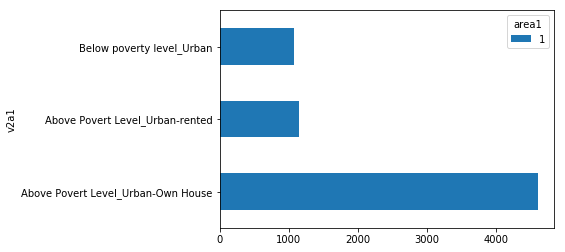

In [246]:
urban_Poverty_level_set=urban_data['v2a1'].apply(poverty_level_urban)
print(pd.crosstab(urban_Poverty_level_set,urban_data['area1']))
pd.crosstab(urban_Poverty_level_set,urban_data['area1']).plot(kind='barh')

In [247]:
# 1142 househild are above poverty line and 1081 houselhold below poverty line in Urabn area
# assuming 0 rent amount as household with onw house, we have 4606 houseld above poverty line 

In [237]:
rural_data = df_train2[df_train2['area1']==0]

In [239]:
rural_data_rented = rural_data[rural_data['v2a1'] !=0]
rural_data_Poverty_level = rural_data_rented.groupby('area1')['v2a1'].apply(np.median)
rural_data_Poverty_level

area1
0    80000.0
Name: v2a1, dtype: float64

In [240]:
# for area1, =0 , assuming rural rear, if people payig rent below 80,000, then they are under poverty line

In [241]:
def poverty_level_rural(x):
    if x == 0:
        return('Above Povert Level_Rural-Own House')
    if x<80000:
        return('Below poverty level_Rural')
    else:
        return ('Above Povert Level_Rural-rented')

area1                                  0
v2a1                                    
Above Povert Level_Rural-Own House  2283
Above Povert Level_Rural-rented      237
Below poverty level_Rural            208


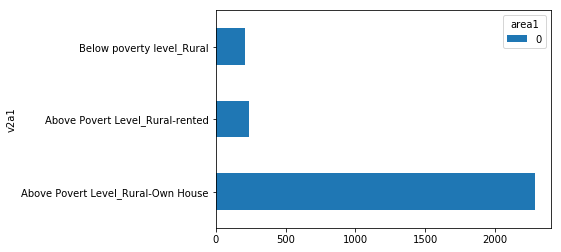

In [245]:
rural_Poverty_level_set=rural_data['v2a1'].apply(poverty_level_rural)
print(pd.crosstab(rural_Poverty_level_set,rural_data['area1']))
pd.crosstab(rural_Poverty_level_set,rural_data['area1']).plot(kind='barh')

In [248]:
# 237 househild are above poverty line and 208 houselhold below poverty line in Rural area
# assuming 0 rent amount as household with onw house, we have 2282 houseld above poverty line 

# Predict the accuracy using random forest classifier.

In [291]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X=df_train2.drop('Target',axis=1)
y=df_train2['Target']

In [292]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [293]:
from sklearn.model_selection import train_test_split
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled,y, train_size=0.7, random_state=42)

In [294]:
from sklearn.ensemble import RandomForestClassifier

RF_classifier_scaled = RandomForestClassifier()
RF_classifier_scaled.fit(X_train_scaled, y_train_scaled)

RandomForestClassifier()

In [295]:
rf_y_predict = RF_classifier_scaled.predict(X_test_scaled)

In [296]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('Model accuracy_score :',accuracy_score(rf_y_predict, y_test_scaled))

Model accuracy_score : 0.905160390516039


# Check the accuracy using random forest with cross validation.

In [297]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,y,train_size=0.7,random_state=42)

In [298]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [299]:
rfc=RandomForestClassifier(random_state=42)
parameters={'n_estimators':[10,50,100,300],'max_depth':[3,5,10,15]}
grid=zip([rfc],[parameters])

In [300]:
best_=None

for i, j in grid:
    a=GridSearchCV(i,param_grid=j,cv=3,n_jobs=1)
    a.fit(X_train,Y_train)
    if best_ is None:
        best_=a
    elif a.best_score_>best_.best_score_:
        best_=a
        
        
print ("Best CV Score",best_.best_score_)
print ("Model Parameters",best_.best_params_)
print("Best Estimator",best_.best_estimator_)

Best CV Score 0.8443715501800226
Model Parameters {'max_depth': 15, 'n_estimators': 300}
Best Estimator RandomForestClassifier(max_depth=15, n_estimators=300, random_state=42)


In [301]:
RFC=best_.best_estimator_
Model=RFC.fit(X_train,Y_train)
pred=Model.predict(X_test)

In [302]:
print('Model accuracy_score :',accuracy_score(pred, Y_test))

Model accuracy_score : 0.8835425383542538


In [270]:
# Checking Top 50 features

In [303]:
X_data_col=X.columns
Important_features=pd.DataFrame(Model.feature_importances_,X_data_col,columns=['feature_importance'])
Top50Features=Important_features.sort_values(by='feature_importance',ascending=False).head(50).index
Top50Features

Index(['SQBmeaned', 'meaneduc', 'SQBdependency', 'dependency', 'overcrowding',
       'qmobilephone', 'SQBovercrowding', 'hogar_nin', 'SQBedjefe',
       'SQBhogar_nin', 'edjefe', 'rooms', 'edjefa', 'cielorazo', 'SQBage',
       'escolari', 'r4h2', 'r4t1', 'age', 'agesq', 'r4m3', 'SQBescolari',
       'r4t2', 'v2a1', 'r4h3', 'eviv3', 'hogar_adul', 'r4m2', 'paredblolad',
       'tamviv', 'v18q1', 'r4m1', 'SQBhogar_total', 'bedrooms', 'pisomoscer',
       'tamhog', 'hhsize', 'r4t3', 'epared3', 'r4h1', 'etecho3', 'lugar1',
       'energcocinar3', 'epared2', 'tipovivi1', 'television', 'etecho2',
       'eviv2', 'paredpreb', 'energcocinar2'],
      dtype='object')

In [304]:
X_data_Top50=X[Top50Features]
X_train,X_test,Y_train,Y_test=train_test_split(X_data_Top50,y,train_size=0.70,random_state=42)
Model_1=RFC.fit(X_train,Y_train)
pred=Model_1.predict(X_test)

In [305]:
print('Model accuracy_score :',accuracy_score(pred, Y_test))

Model accuracy_score : 0.9034170153417015


# Working on the test dataset

In [275]:
df_test1.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,NaN,0,5,0,1,1,0,NaN,1,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,NaN,0,5,0,1,1,0,NaN,1,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,NaN,0,5,0,1,1,0,NaN,1,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,NaN,0,14,0,1,1,1,1.0,0,1,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,175000.0,0,4,0,1,1,1,1.0,0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [279]:
df_test1.shape

(23856, 140)

In [280]:
for i in df_test1.columns:
    if df_test1[i].isnull().sum()>0:
        print(i,"--> ",df_test1[i].isnull().sum())

v2a1 -->  17403
v18q1 -->  18126
rez_esc -->  19653
meaneduc -->  31
SQBmeaned -->  31


In [281]:
# Handling missing data

# for v2a1, Monthly rent payment, there could be possibility 
# that members with their own house so they won't pay rent , hence the rent will be 0 
# similarly for nd v18q1, number of tablets household owns, there could be household with zero own tablet

df_test1['v2a1'].fillna(0,inplace=True)
df_test1['v18q1'].fillna(0,inplace=True)


# updating missing values with mean values for meaneduc and SQBmeaned
df_test1['meaneduc'].fillna(np.mean(df_test1['meaneduc']),inplace=True)
df_test1['SQBmeaned'].fillna(np.mean(df_test1['SQBmeaned']),inplace=True)

In [282]:
for i in df_test1.columns:
    if df_test1[i].isnull().sum()>0:
        print(i,"--> ",df_test1[i].isnull().sum())

rez_esc -->  19653


In [283]:
19653/df_test1['rez_esc'].shape[0]

0.823817907444668

In [284]:
df_test2 = df_test1.drop(['tipovivi3','hogar_total', 'v18q','rez_esc','elimbasu5'],axis=1)
df_test2.shape

(23856, 135)

In [285]:
df_test2.isnull().sum().any()

False

In [306]:
test_data=df_test2[Top50Features]

In [311]:
# without scaling
test_prediction=Model_1.predict(test_data)
test_prediction

array([4, 4, 4, ..., 2, 2, 2], dtype=int64)

In [309]:
# with scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(test_data)

In [310]:
test_prediction_scaled=Model_1.predict(test_data)
test_prediction_scaled

array([4, 4, 4, ..., 2, 2, 2], dtype=int64)

# Conclusion:
## using Random forest and taking only the important featurce we get accuracy of 90.5%